### Figure 5: remaze analyses

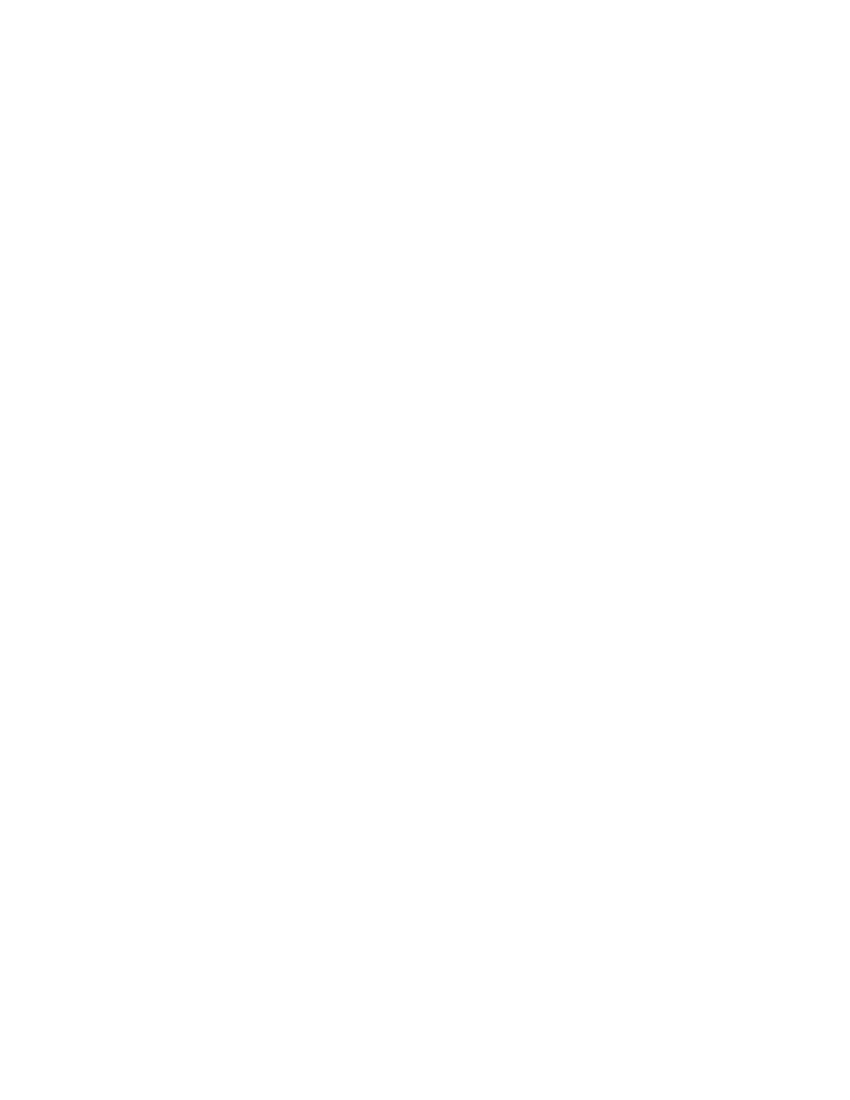

In [29]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import subjects
from subjects import sd_span, nsd_span, grp_span
import pandas as pd
import seaborn as sns
from neuropy.plotting import Fig
from scipy import stats


grpdata = subjects.GroupData()
group = ["NSD", "SD"]

# remaze_ev
ev_df = grpdata.remaze_ev

# remaze temporal bias
bias_df = grpdata.remaze_temporal_bias
colors_bias = subjects.colors_sd(1.2)
tb_com = grpdata.remaze_temporal_bias_com_correlation_across_session


# ensembles
ensemble_corr = grpdata.remaze_ensemble_corr_across_sess
ensemble_activation = grpdata.remaze_ensemble_activation_across_sess
activation_df = grpdata.remaze_activation_of_maze

fig = Fig(grid=(5, 3), hspace=0.45, wspace=0.4)
filename = subjects.figpath_sd / "figure5"
caption = "hello"

### ev

In [30]:
from statannotations.Annotator import Annotator
ax = fig.subplot(fig.gs[0])
sns.boxplot(
    data=ev_df,
    x="grp",
    y="ev",
    hue="ev_name",
    palette=["#616161", "#BDBDBD"],
    medianprops=dict(color='w',lw=1.5),
    showcaps=False,
    boxprops=dict(edgecolor='none'),
    ax=ax,
)
pairs = [
    (("nsd", "ev"), ("nsd", "rev")),
    (("sd", "ev"), ("sd", "rev")),
    (("nsd", "ev"), ("sd", "ev")),

]

# annotator = Annotator(
#     ax,
#     pairs,
#     data=ev_df,
#     x="grp",
#     y="ev",
#     order=['nsd','sd'],
#     hue="ev_name",
#     hue_order=['ev','rev'],
# )
# annotator.configure(test="t-test_welch", text_format="star", loc="outside")
# annotator.apply_and_annotate()


ax.legend('',frameon=False)

### temporal bias maze vs remaze

### maze activation on remaze

In [31]:
ax = fig.subplot(fig.gs[1])
sns.boxplot(
    data=activation_df,
    x="grp",
    y="activation",
    ax=ax,
    medianprops=dict(color="w", lw=1.5),
    showcaps=False,
    boxprops=dict(edgecolor="none"),
    width=0.4,
)


<AxesSubplot:xlabel='grp', ylabel='activation'>

### temporal bias COM across sesssion

In [32]:

for i, key in enumerate(group):
    ax = fig.subplot(fig.gs[1,i])
    ax.imshow(
        tb_com[key],
        cmap="jet",
        vmin=-0.15,
        vmax=0.15,
        origin="lower",
    )
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Epochs")
    ax.set_xticks(np.arange(11), tb_com['epoch_names'])
    ax.set_yticks(np.arange(11), tb_com['epoch_names'])
    ax.tick_params("x", labelrotation=90)



### Ensemble correlation across sesssion

### Ensemble activation across sesssion

In [33]:

for i, key in enumerate(group):
    ax = fig.subplot(fig.gs[2,i])
    ax.imshow(
        ensemble_activation[key],
        cmap="jet",
        vmin=0,
        vmax=0.3,
        origin="lower",
    )
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Epochs")
    ax.set_xticks(np.arange(5), ensemble_activation['epoch_names'])
    ax.set_yticks(np.arange(5),ensemble_activation['epoch_names'])
    ax.tick_params("x", labelrotation=90)



### saving

In [34]:
# fig.savefig(filename,caption=caption)